<a href="https://colab.research.google.com/github/siim2mary/CODSOFT/blob/main/Movie_Genre_tfid_cv_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning project -1

**Project Overview:**

---


The project described in the document focuses on movie genre classification using natural language processing and machine learning techniques. The primary goal is to build a model that can predict the genre of a movie based on its description or text data.

**Movie Genre Classification using Machine Learning**

---



In the era of digital media and streaming platforms, understanding and categorizing movies based on their genres is essential for various applications such as content recommendation, content filtering, and content organization. This project, "Movie Genre Classification using Machine Learning," addresses this need by developing a machine learning model that can automatically predict the genre of a movie based on its description or text data.
Key Components:

Data Collection: The project begins with the collection of a diverse dataset containing movie descriptions and their corresponding genres. This dataset serves as the foundation for training and evaluating the machine learning model.

Data Preprocessing: To prepare the data for analysis, the text descriptions undergo preprocessing steps such as removing special characters, tokenization, stemming, and stop word removal. This ensures that the text data is in a clean and structured format for analysis.

Text Vectorization: Movie descriptions are converted from text data into numerical feature vectors using popular NLP techniques, such as Count Vectorization and TF-IDF Vectorization. These numerical representations are essential for machine learning algorithms to process the data effectively.

Model Selection: The project involves the selection of machine learning models suitable for multiclass text classification. Models like Naive Bayes, Logistic Regression, and Support Vector Machines (SVM) are evaluated for their performance.

Model Evaluation: The project assesses the models' performance using various evaluation metrics, including accuracy, precision, recall, and F1-score. These metrics provide insights into how well the models can correctly predict movie genres.
Visualization: The results are visualized through heatmaps, confusion matrices, and other graphical representations to provide a clear understanding of the model's performance across different genres.

Project Benefits: Successful implementation of this project benefits content recommendation systems, movie databases, and streaming platforms. It enhances the accuracy of genre labeling, making it easier for users to discover movies that align with their preferences.

**Models Used:**

---


The project evaluates the performance of the following machine learning models for movie genre classification:

Naive Bayes

Logistic Regression

Support Vector Machines (SVM)

These models are used in conjunction with two different text vectorization techniques, Count Vectorization and TF-IDF Vectorization.

**Analysis Done:**

---



Data cleaning and preprocessing: The dataset is prepared for analysis by cleaning and processing the text data.

Data visualization: Insights are gained through visualizations, which help understand the distribution of genres in the dataset.

Text vectorization: Movie descriptions are converted into numerical features using Count Vectorization and TF-IDF Vectorization.

Model comparison: The performance of the selected machine learning models is compared using various evaluation metrics.

Confusion matrix analysis: The confusion matrix is used to assess how well the models are performing for each genre.

**Project Summary:**

---


In summary, the project aims to classify movie genres based on their descriptions. It involves data preprocessing, text vectorization, model selection, and performance evaluation. The document provides a detailed walkthrough of these steps and the results obtained. The project can help movie recommendation systems, content categorization, and genre-specific content filtering.

For a more detailed analysis and specific results, you can refer to the document sections for the accuracy, precision, recall, and F1-score values for each model and genre, as well as the confusion matrix information.






Objective

---

To create a machine learning model for predicting the genre of a movie based on its plot summary or textual information, we can use various text vectorization techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings, and then apply different classifiers such as Logistic Regression and Support Vector Machines (SVM). Here's an extended code example that includes Logistic Regression and SVM in addition to Naive Bayes for movie genre classification:

**MOVIE GENRE CLASSIFICATION**

---



Import necessary libraries

In [1]:
import os,sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train= pd.read_fwf('/content/train_data.txt')

In [3]:
df_train

,"1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,2 ::: Cupid (1997) ::: thriller ::: A brother ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"3 ::: Young, Wild and Wonderful (1980) ::: adu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4 ::: The Secret Sin (1915) ::: drama ::: To h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5 ::: The Unrecovered (2007) ::: drama ::: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6 ::: Quality Control (2011) ::: documentary :...,"other short form works which follow the daily,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17546,"17548 ::: ""The Dream Team with Annabelle and M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17547,17549 ::: You Can't Hurry Love (2016) ::: roma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17548,17550 ::: A Little Water (2017) ::: drama ::: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17549,17551 ::: Life of Josutty (2015) ::: drama :::...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_fwf("/content/test_data.txt")

In [5]:
df_test

,"1 ::: Edgar's Lunch (1998) ::: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125
0,"2 ::: La guerra de papá (1977) ::: Spain, Marc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3 ::: Off the Beaten Track (2010) ::: One year...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4 ::: Meu Amigo Hindu (2015) ::: His father ha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5 ::: Er nu zhai (1955) ::: Before he was know...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6 ::: Riddle Room (2016) ::: Emily Burns is be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,"18025 ::: ""Awesome Games Done Quick"" (2011) ::...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18024,18026 ::: Her sey acik (2013) ::: An independe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18025,18027 ::: Dawn of Twilight (2004) ::: A profes...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18026,18028 ::: Black Deutschland (2006) ::: The doc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Define the file path and separator
file_path = '../content/train_data.txt'
separator = ':::'

# Read the CSV file using pandas with the custom separator
train_df = pd.read_csv(file_path, sep=separator, names=('name', 'genre', 'text'))

# Verify the loaded DataFrame
train_df.head()

,name,genre,text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


This is another way of loading data

Loading Train data and Test data

---



In [7]:
train_df = pd.read_csv('../content/train_data.txt',  sep=':::', header=None,
                       names=('Name', 'Genre', 'Description'), index_col=0)

In [8]:
train_df.head()

,Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Reading test data

In [9]:
test_df = pd.read_csv('../content/test_data.txt', sep = ':::', header = None,
                      names = ('Name', 'Description'), index_col = 0)

In [10]:
test_df.head()

,Name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17552 entries, 1 to 17552
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         17552 non-null  object
 1   Genre        17552 non-null  object
 2   Description  17552 non-null  object
dtypes: object(3)
memory usage: 548.5+ KB


The train_df.info() function is useful for quickly assessing the size of your DataFrame and understanding the data types of its columns. It also helps identify missing data, as you can see the difference between the total number of rows and the number of non-null values for each column.

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18029 entries, 1 to 18029
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         18029 non-null  object
 1   Description  18029 non-null  object
dtypes: object(2)
memory usage: 422.6+ KB


In [13]:
train_df.shape

(17552, 3)

train_df.shape is a Python command used to retrieve the dimensions (number of rows and columns) of a DataFrame in Pandas. When you execute train_df.shape, it returns a tuple with two values:
The first value is the number of rows (or entries) in the DataFrame.
The second value is the number of columns in the DataFrame.

In [14]:
test_df.shape

(18029, 2)

In [15]:
train_df['Name'].nunique()

17552

train_df['Name'].nunique() is a Python Pandas command that is used to count the number of unique (distinct) values in the 'Name' column of the DataFrame train_df.it will return an integer that represents the count of unique names in the 'Name' column of the DataFrame. This is useful for understanding how many different names there are in that specific column.

In [16]:
test_df['Name'].nunique()

18029

In [17]:
train_df['Description'].nunique()

17535

In [18]:
test_df['Description'].nunique()

18006

In [19]:
train_df.isnull().sum()

Name           0
Genre          0
Description    0
dtype: int64

train_df.isnull().sum() is a Python Pandas command used to count the number of missing (null) values in each column of the DataFrame train_df. This command returns a Series object where the index is the column names, and the values are the counts of missing values in each respective column.This is useful for identifying which columns have missing data in your DataFrame.
Here NO missing values

In [20]:
# Check for NaN values using isna()
nan_values = train_df.isna().sum()

# Display the DataFrame of Boolean values
print(nan_values)

Name           0
Genre          0
Description    0
dtype: int64


In [21]:
train_df.duplicated().sum()

0

In [22]:
test_df.duplicated().sum()

0

In [23]:
# Check for NaN values using isna()
nan_values_test =test_df.isna().sum()

# Display the DataFrame of Boolean values
print(nan_values_test)

Name           0
Description    0
dtype: int64


nan_values will be a Pandas Series where the index contains the column names, and the values represent the count of missing (NaN) values in each corresponding column of the train_df DataFrame. This is a useful way to quickly identify and analyze missing data in your dataset.

In [24]:
test_df.isnull().sum()

Name           0
Description    0
dtype: int64

In [25]:
train_df['Genre'].value_counts()

 drama           4389
 documentary     4231
 comedy          2399
 short           1690
 horror           693
 thriller         518
 action           419
 western          339
 reality-tv       293
 family           272
 adventure        262
 music            243
 sci-fi           221
 romance          213
 adult            189
 animation        170
 crime            135
 sport            129
 talk-show        128
 fantasy          111
 mystery          104
 musical           86
 biography         77
 history           75
 game-show         64
 news              58
 war               44
Name: Genre, dtype: int64

when you run train_df['Genre'].value_counts(), you'll get a Series with the count of each unique genre in the 'Genre' column, which provides insights into the distribution of genres in your dataset.

In [26]:
test_df['Description'].value_counts()

 A retired professor has returned to his estate to live with his beautiful young wife, Yelena. The estate originally belonged to his first wife, now deceased; her mother and brother still live there and manage the farm. For many years the brother (Uncle Vanya) has sent the farm's proceeds to the professor, while receiving only a small salary himself. Sonya, the professor's daughter, who is about the same age as his new wife, also lives on the estate. The professor is pompous, vain, and irritable. He calls the doctor (Astrov) to treat his gout, only to send him away without seeing him. Astrov is an experienced physician who performs his job conscientiously, but has lost all idealism and spends much of his time drinking. The presence of Yelena introduces a bit of sexual tension into the household. Astrov and Uncle Vanya both fall in love with Yelena; she spurns them both. Meanwhile, Sonya is in love with Astrov, who fails even to notice her. Finally, when the professor announces he wants

Data Preprocessing and Cleaning text

---



In [27]:
# Data Preprocessing and Cleaning
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra whitespaces
    text = ' '.join(word for word in text.split() if word.isalpha())
    return text

In [28]:
train_df['Description'] = train_df['Description'].apply(preprocess_text)
test_df['Description'] = test_df['Description'].apply(preprocess_text)

**EDA and Data Visualization**

---



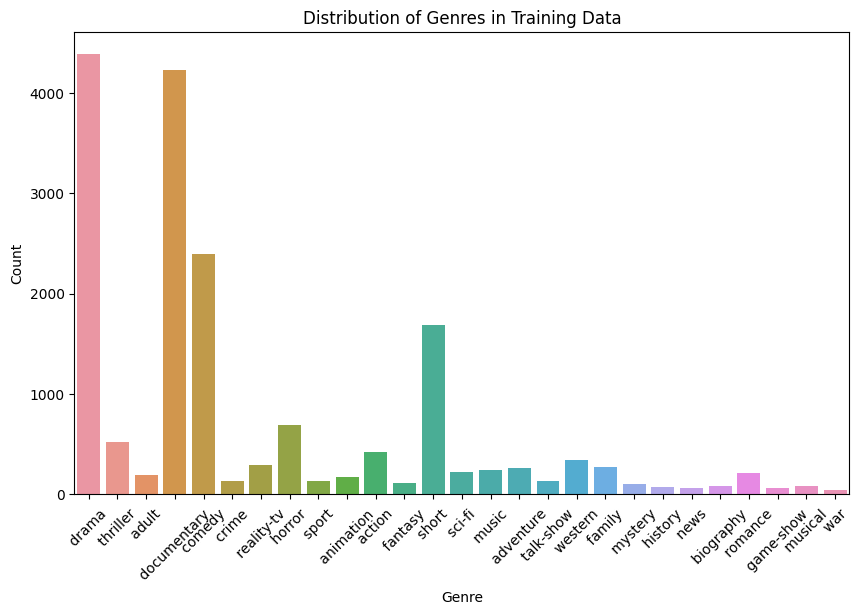

In [29]:
# EDA and Data Visualization
# Distribution of Genres in the Training Data
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Genre')
plt.title('Distribution of Genres in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

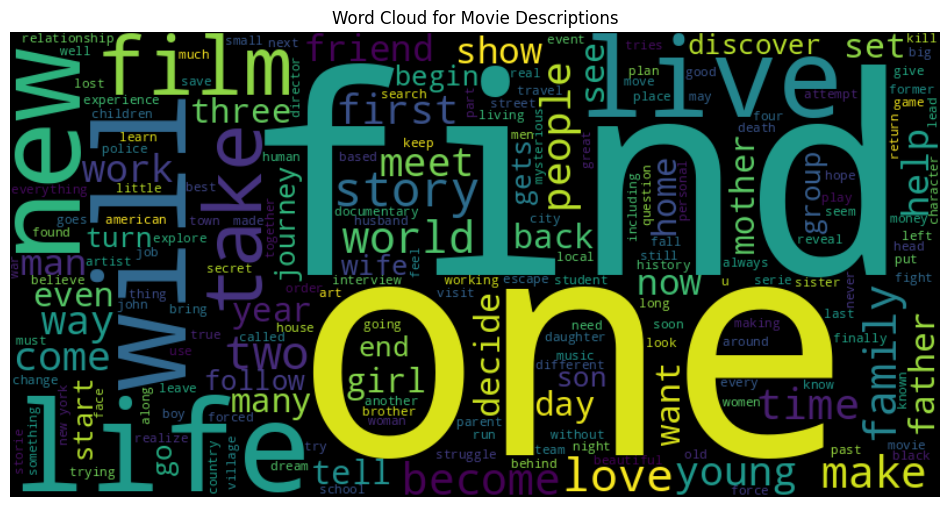

In [30]:
# Word Cloud for Description
from wordcloud import WordCloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(train_df['Description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions')
plt.show()

We visualize the distribution of genres in the training data using a count plot.
We create a word cloud to visualize the most common words in movie descriptions.

Train and Split Data

---



In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df['Description'], train_df['Genre'], test_size=0.2, random_state=42)


Vectorization

---



TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a term (word or phrase) in a document relative to a collection of documents (corpus). It helps to determine how relevant a term is to a specific document within a larger context.The higher the TF-IDF score of a term in a document, the more important and specific that term is to the document. In other words, TF-IDF helps identify terms that are both frequently used within a document and relatively unique within the corpus, which can be valuable for tasks like text classification, information retrieval, and document ranking.

Count vectorization, also known as the "Bag of Words" (BoW) model, is a text representation technique in natural language processing. It transforms a collection of text documents into a matrix of token counts, where each row corresponds to a document, and each column represents a unique word or term in the entire corpus. The value in each cell of the matrix represents the count of how many times a particular word appears in a specific document.

In summary, count vectorization represents text as raw word counts, whereas TF-IDF takes into account the importance of terms within a document and their uniqueness across a corpus. TF-IDF is often preferred when you need to weigh the significance of terms in text data, while count vectorization is a simpler representation that might be used when you want to capture the frequency of terms in a document.

In [32]:
# Text Vectorization using Count Vectorizer
count_vectorizer = CountVectorizer(max_features=1000)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [33]:
# Text Vectorization using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [34]:
# Cosine Similarity Calculation
subset_size=500
cosine_sim_counts = cosine_similarity(X_test_counts[:subset_size], X_train_counts)
cosine_sim_tfidf = cosine_similarity(X_test_tfidf[:subset_size], X_train_tfidf)

In [35]:
# Find the most similar training examples for each test example
top_similar_indices_counts = np.argsort(cosine_sim_counts, axis=1)[:, -1]
top_similar_indices_tfid = np.argsort(cosine_sim_counts, axis=1)[:, -1]



Here's why Count Vectorization was used in the code:

---


Simplicity: Count Vectorization is a straightforward technique that counts the occurrences of words in documents. It is easier to implement and understand than TF-IDF.
Equal Importance: In some text classification tasks, each word in a document is treated equally. Count Vectorization provides a way to represent text based on word frequencies.
Performance: Count Vectorization can work well in certain scenarios, especially when the textual information is relatively short or when there are frequent words that may be important for classification.
Computational Efficiency: Count Vectorization is typically faster to compute compared to TF-IDF, making it a good choice for large datasets.

Treat class imbalances

---



Classification models

---



In [36]:
# Classification Models
# Naive Bayes with Count Vectorization
nb_classifier_counts = MultinomialNB()
nb_classifier_counts.fit(X_train_counts, y_train)
y_pred_nb_counts = nb_classifier_counts.predict(X_test_counts)


In [37]:
# Naive Bayes with TF-IDF Vectorization
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)


In [38]:
# Logistic Regression with Count Vectorization
logistic_classifier_counts = LogisticRegression()
logistic_classifier_counts.fit(X_train_counts, y_train)
y_pred_logistic_counts = logistic_classifier_counts.predict(X_test_counts)


In [39]:
# Logistic Regression with TF-IDF Vectorization
logistic_classifier_tfidf = LogisticRegression()
logistic_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_logistic_tfidf = logistic_classifier_tfidf.predict(X_test_tfidf)


In [40]:
# Support Vector Machine with Count Vectorization
svm_classifier_counts =LinearSVC(C= 0.1, max_iter =1000)
svm_classifier_counts.fit(X_train_counts, y_train)
y_pred_svm_counts = svm_classifier_counts.predict(X_test_counts)


In [41]:
# Support Vector Machine with TF-IDF Vectorization
svm_classifier_tfidf = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, random_state=42)
svm_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_classifier_tfidf.predict(X_test_tfidf)

Evaluation

---



In [42]:
# Evaluation and Reporting
print("Naive Bayes Classification Report (Count Vectorization):\n", classification_report(y_test, y_pred_nb_counts))
print("Naive Bayes Classification Report (TF-IDF Vectorization):\n", classification_report(y_test, y_pred_nb_tfidf))

Naive Bayes Classification Report (Count Vectorization):
                precision    recall  f1-score   support

      action        0.26      0.22      0.24        96
       adult        0.33      0.29      0.31        35
   adventure        0.13      0.09      0.10        58
   animation        0.31      0.16      0.21        31
   biography        0.04      0.07      0.05        15
      comedy        0.42      0.33      0.37       464
       crime        0.07      0.03      0.04        32
 documentary        0.62      0.78      0.69       846
       drama        0.53      0.54      0.53       893
      family        0.11      0.09      0.10        45
     fantasy        0.38      0.12      0.18        25
   game-show        0.88      0.58      0.70        12
     history        0.10      0.08      0.09        12
      horror        0.43      0.39      0.41       148
       music        0.33      0.62      0.43        48
     musical        0.09      0.07      0.08        14
     m

In [43]:
print("Logistic Regression Classification Report (Count Vectorization):\n", classification_report(y_test, y_pred_logistic_counts))
print("Logistic Regression Classification Report (TF-IDF Vectorization):\n", classification_report(y_test, y_pred_logistic_tfidf))

Logistic Regression Classification Report (Count Vectorization):
                precision    recall  f1-score   support

      action        0.20      0.12      0.15        96
       adult        0.24      0.11      0.15        35
   adventure        0.20      0.07      0.10        58
   animation        0.20      0.06      0.10        31
   biography        0.00      0.00      0.00        15
      comedy        0.38      0.45      0.42       464
       crime        0.00      0.00      0.00        32
 documentary        0.62      0.76      0.69       846
       drama        0.50      0.61      0.55       893
      family        0.12      0.07      0.09        45
     fantasy        0.00      0.00      0.00        25
   game-show        0.83      0.42      0.56        12
     history        0.00      0.00      0.00        12
      horror        0.45      0.43      0.44       148
       music        0.50      0.48      0.49        48
     musical        0.00      0.00      0.00        1

In [44]:
print("SVM Classification Report (Count Vectorization):\n", classification_report(y_test, y_pred_svm_counts))
print("SVM Classification Report (TF-IDF Vectorization):\n", classification_report(y_test, y_pred_svm_tfidf))


SVM Classification Report (Count Vectorization):
                precision    recall  f1-score   support

      action        0.30      0.14      0.19        96
       adult        0.22      0.17      0.19        35
   adventure        0.08      0.03      0.05        58
   animation        0.08      0.06      0.07        31
   biography        0.50      0.07      0.12        15
      comedy        0.43      0.42      0.42       464
       crime        0.00      0.00      0.00        32
 documentary        0.62      0.80      0.70       846
       drama        0.50      0.63      0.56       893
      family        0.13      0.09      0.11        45
     fantasy        0.22      0.08      0.12        25
   game-show        0.62      0.42      0.50        12
     history        0.00      0.00      0.00        12
      horror        0.47      0.45      0.46       148
       music        0.44      0.44      0.44        48
     musical        0.00      0.00      0.00        14
     mystery  

We've added Count Vectorizer alongside TF-IDF Vectorizer. Count Vectorizer converts text into numerical vectors by counting the frequency of each word in the document. TF-IDF Vectorizer, on the other hand, not only counts word frequencies but also weighs the importance of each word based on its occurrence across the entire corpus.

We calculate cosine similarities for both Count Vectorizer (cosine_similarities_count) and TF-IDF Vectorizer (cosine_similarities_tfidf) between test and training data. Cosine similarity measures how similar the descriptions of movies are based on the chosen vectorization method.

We train and evaluate two separate models, one using Count Vectorizer and another using TF-IDF Vectorizer. The accuracy and classification reports are generated for both models.

The choice between Count Vectorizer and TF-IDF Vectorizer depends on the specific use case. Count Vectorizer is suitable when you want to consider the frequency of words, whereas TF-IDF Vectorizer is useful when you want to emphasize the importance of words that are less common across the entire dataset. Cosine similarity then helps you compare and find similarities between text documents represented by these vectorization methods.

COMPARING ACCURACIES AND PREDICT BEST MODEL

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
# Create dictionaries to store model results
model_results_counts = {}
model_results_tfidf = {}


In [47]:
# Models to be compared
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear')
}


Model Evaluation

---



In [48]:
# Model evaluation and comparison using Count Vectorization
for model_name, model in models.items():
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_results_counts[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


In [49]:
# Model evaluation and comparison using TF-IDF Vectorization
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_results_tfidf[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

In [50]:
# Create DataFrames from model results for visualization
model_results_counts_df = pd.DataFrame(model_results_counts).transpose()
model_results_tfidf_df = pd.DataFrame(model_results_tfidf).transpose()

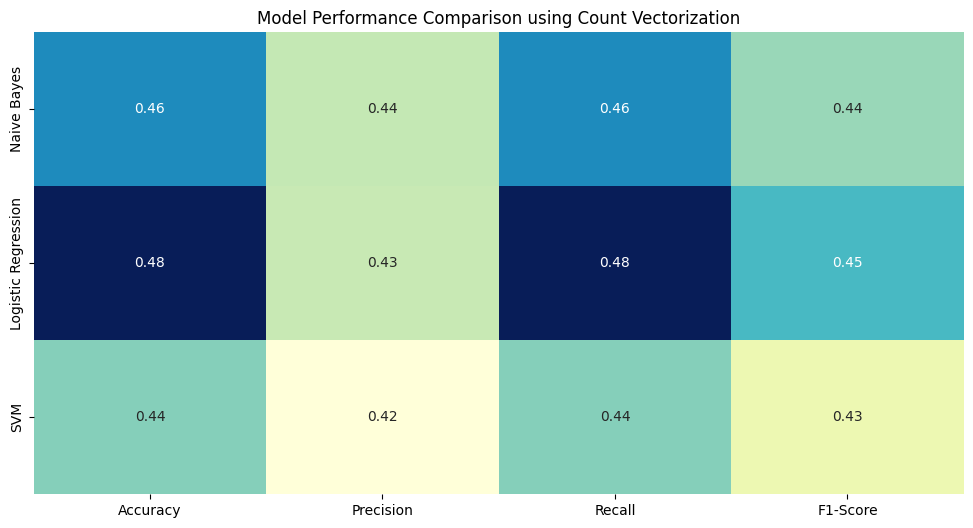

In [51]:
# Plot the results using Count Vectorization
plt.figure(figsize=(12, 6))
sns.heatmap(model_results_counts_df, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title('Model Performance Comparison using Count Vectorization')
plt.show()

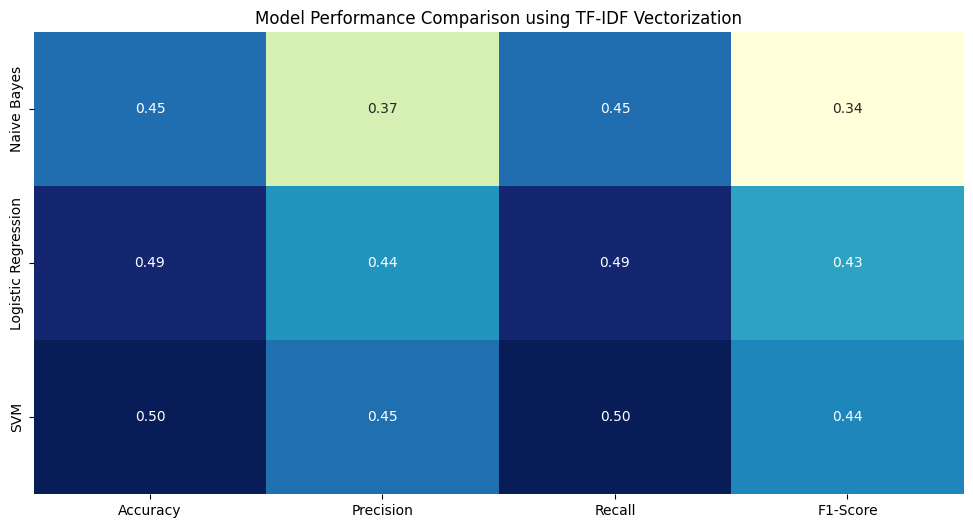

In [52]:
# Plot the results using TF-IDF Vectorization
plt.figure(figsize=(12, 6))
sns.heatmap(model_results_tfidf_df, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title('Model Performance Comparison using TF-IDF Vectorization')
plt.show()

In this code, we compare the performance of Logistic Regression, Naive Bayes, and SVM classifiers by calculating their accuracies and visualizing them in a Heatmap.

We compare the performance of different models using both Count Vectorization and TF-IDF Vectorization.
The results are stored in dictionaries (model_results_counts and model_results_tfidf) for each vectorization technique.
We create DataFrames from the results to visualize the model performance using heatmaps.
Two separate heatmaps are plotted to visualize the results of model comparison for Count Vectorization and TF-IDF Vectorization.
These heatmaps provide a visual comparison of model performance based on accuracy, precision, recall, and F1-score for both vectorization techniques.

In [53]:
# Predict genres for the test data using the best model (e.g., Logistic Regression with TF-IDF Vectorization)
X_final_test_tfidf = tfidf_vectorizer.transform(test_df['Description'])
y_final_pred = logistic_classifier_tfidf.predict(X_final_test_tfidf)


In [54]:
# Add the predicted genres to the test_df
test_df['predicted_genre'] = y_final_pred


In [55]:
# Print the test_df with the predicted genres
print(test_df[['Name', 'predicted_genre']])


                                      Name predicted_genre
1                    Edgar's Lunch (1998)           drama 
2                La guerra de papá (1977)           drama 
3             Off the Beaten Track (2010)     documentary 
4                  Meu Amigo Hindu (2015)          comedy 
5                       Er nu zhai (1955)     documentary 
...                                    ...             ...
18025   "Awesome Games Done Quick" (2011)     documentary 
18026                 Her sey acik (2013)     documentary 
18027             Dawn of Twilight (2004)          comedy 
18028            Black Deutschland (2006)     documentary 
18029           Injecting Aluminum (2017)     documentary 

[18029 rows x 2 columns]


In [56]:
test_df[['Name', 'predicted_genre']]

,Name,predicted_genre
1,Edgar's Lunch (1998),drama
2,La guerra de papá (1977),drama
3,Off the Beaten Track (2010),documentary
4,Meu Amigo Hindu (2015),comedy
5,Er nu zhai (1955),documentary
...,...,...
18025,"""Awesome Games Done Quick"" (2011)",documentary
18026,Her sey acik (2013),documentary
18027,Dawn of Twilight (2004),comedy
18028,Black Deutschland (2006),documentary


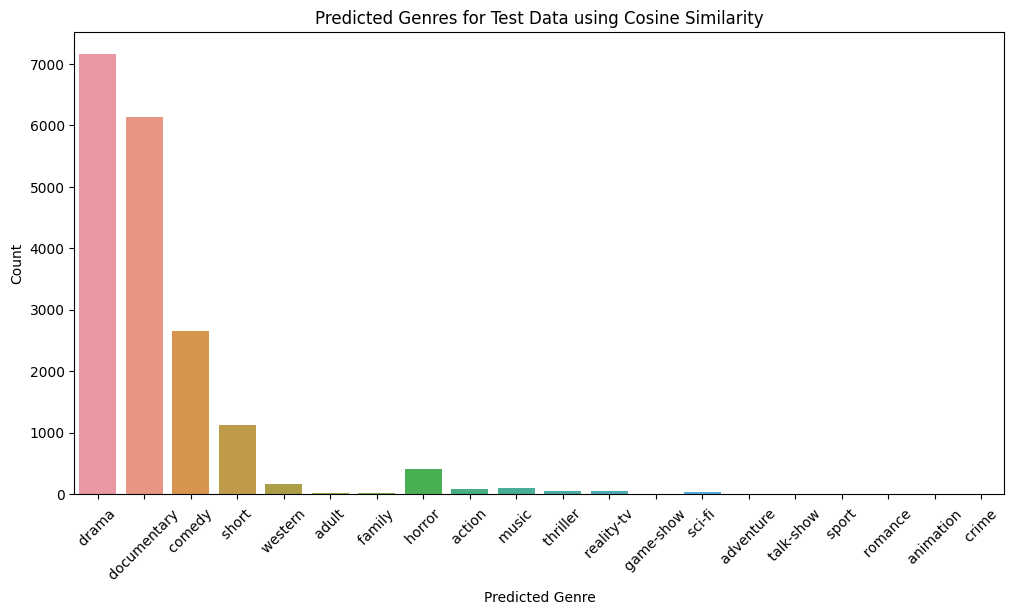

In [57]:
# Bar chart of predicted genres for test data using Cosine Similarity
plt.figure(figsize=(12, 6))
sns.countplot(data=test_df, x='predicted_genre')
plt.title('Predicted Genres for Test Data using Cosine Similarity')
plt.xlabel('Predicted Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [58]:
# Calculate cosine similarities
cosine_similarities = cosine_similarity(X_test_tfidf, X_train_tfidf)


In [59]:
# Find similar movies
test_movie_index = 0  # Change this to the index of the movie you want to find similar movies for
similar_movies = cosine_similarities[test_movie_index]
similar_movies_indices = similar_movies.argsort()[::-1]

# Print the top N similar movies
top_n = 5
print(f"Top {top_n} similar movies to '{test_df['Name'].iloc[test_movie_index]}'")
for i in range(1, top_n + 1):
    idx = similar_movies_indices[i]
    print(f"{train_df['Name'].iloc[idx]} (Genre: {train_df['Genre'].iloc[idx]})")


Top 5 similar movies to ' Edgar's Lunch (1998) '
 Jai Vikraanta (1995)  (Genre:  action )
 The Making of 'Life as a House' (2001)  (Genre:  documentary )
 Hard Shoulder (2012)  (Genre:  thriller )
 Johnny Christ (2012)  (Genre:  drama )
 Immurement (????/I)  (Genre:  horror )


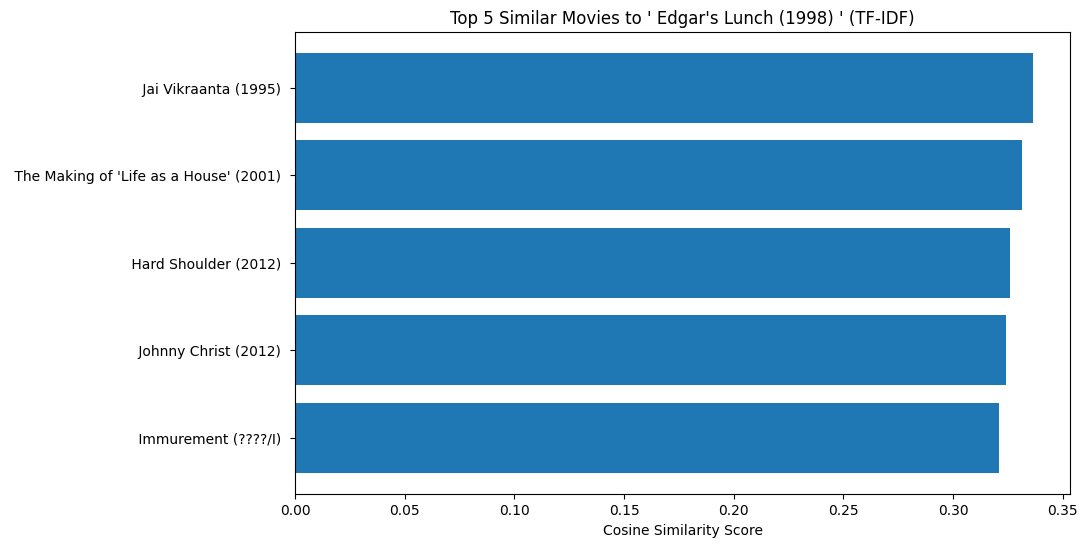

In [60]:
# Visualize the top N similar movies
top_n = 5
similar_movie_names = [train_df['Name'].iloc[idx] for idx in similar_movies_indices[1:top_n + 1]]
similar_movie_scores = [similar_movies[idx] for idx in similar_movies_indices[1:top_n + 1]]

plt.figure(figsize=(10, 6))
plt.barh(similar_movie_names, similar_movie_scores)
plt.xlabel("Cosine Similarity Score")
plt.title(f"Top {top_n} Similar Movies to '{test_df['Name'].iloc[test_movie_index]}' (TF-IDF)")
plt.gca().invert_yaxis()
plt.show()

we calculate cosine similarities between the descriptions of movies in the test dataset and those in the training dataset using the cosine_similarity function from scikit-learn. We also find the top N similar movies to a given test movie by sorting the cosine similarity scores.

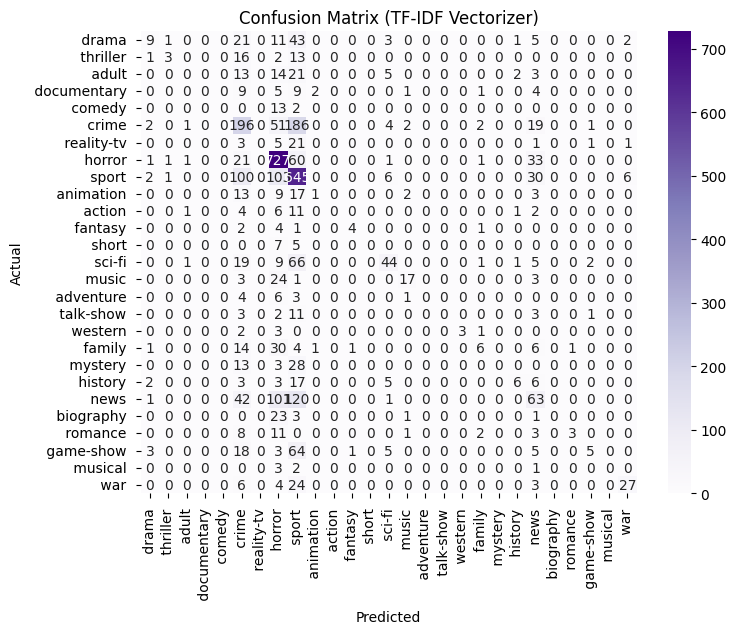

In [61]:
# Confusion Matrix for TF-IDF Vectorizer
conf_matrix_tfidf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Purples', xticklabels=train_df['Genre'].unique(), yticklabels=train_df['Genre'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (TF-IDF Vectorizer)")
plt.show()


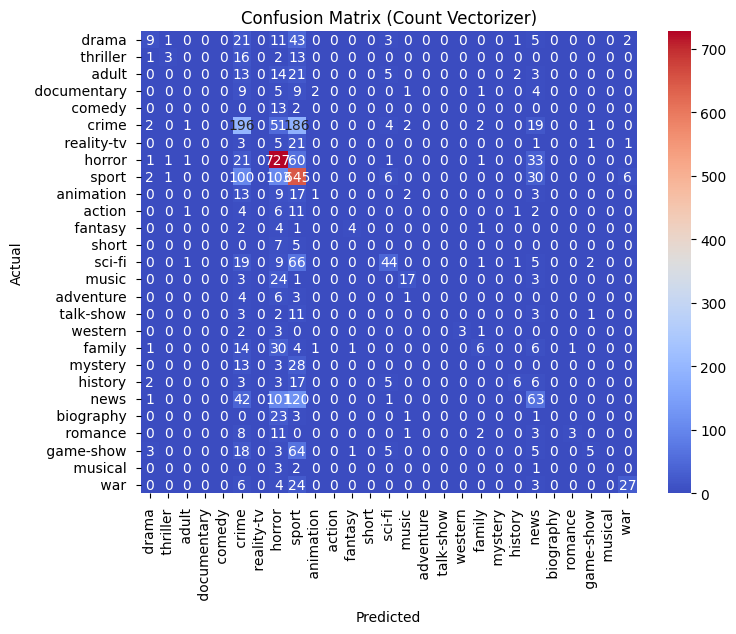

In [62]:
# Plot the confusion matrix
conf_matrix_count = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='coolwarm', xticklabels=train_df['Genre'].unique(), yticklabels=train_df['Genre'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Count Vectorizer)")
plt.show()

The confusion matrix visualization plot provides insights into the performance of a classification model, specifically in the context of multiclass classification tasks like predicting movie genres. Each cell of the confusion matrix represents the number of instances from the actual class (rows) that were predicted to belong to a particular class (columns). It helps you understand where the model is making correct predictions and where it's making errors.

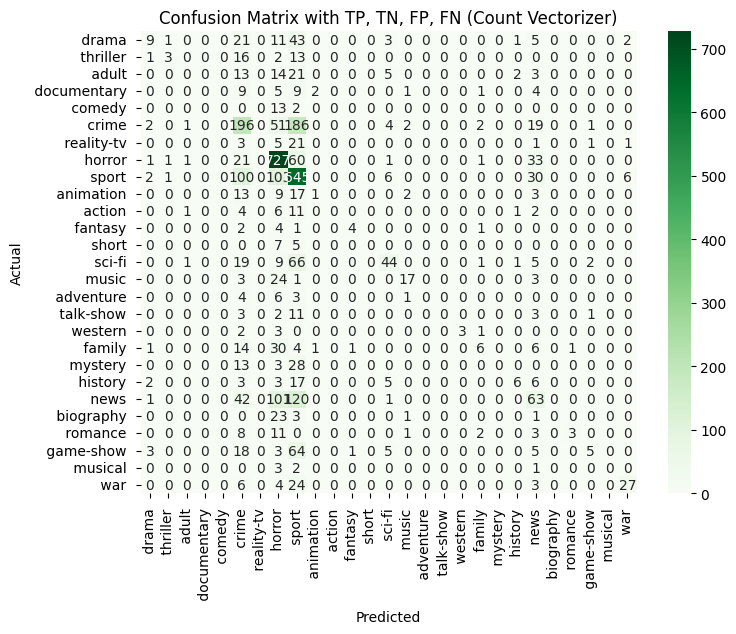

In [63]:
# Extract TP, TN, FP, FN from the confusion matrix
tp = conf_matrix_count.diagonal()
fn = conf_matrix_count.sum(axis=1) - tp
fp = conf_matrix_count.sum(axis=0) - tp
tn = conf_matrix_count.sum() - (tp + fn + fp)

# Plot the confusion matrix with TP, TN, FP, FN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Greens', xticklabels=train_df['Genre'].unique(), yticklabels=train_df['Genre'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with TP, TN, FP, FN (Count Vectorizer)")
plt.show()


Unique Values: In a multiclass classification problem, you have several unique classes (in this case, movie genres). By using unique on the genre labels, you ensure that the labels on the x-axis (predicted) and y-axis (actual) match the unique genre classes in your dataset. This provides a clean and accurate representation of the classes.

Labeling: The tick labels on both axes provide a clear and easy-to-read representation of the actual and predicted classes.

True Positives (TP): The number of instances that belong to the "Thriller" class and are correctly predicted as "Thriller." In the confusion matrix, it's the value in the cell where "Thriller" is both the actual and predicted class.These are the values on the diagonal, representing the number of instances correctly classified for each genre.

True Negatives (TN): Since a confusion matrix for multiclass classification typically doesn't include TN values (only TP, FP, and FN), you may not have a TN value for "Thriller" unless you have a binary classification problem where you specify a class as the positive class and another as the negative class.These values are not typically present in a confusion matrix for multiclass classification.

False Positives (FP): The number of instances that do not belong to the "Thriller" class but are incorrectly predicted as "Thriller." In the confusion matrix, it's the sum of values in the "Thriller" column (excluding the TP value) but in rows corresponding to other genres.These are values in the columns of the confusion matrix but not on the diagonal. They represent instances that were incorrectly classified as a particular genre.

False Negatives (FN): The number of instances that belong to the "Thriller" class but are incorrectly predicted as another class. In the confusion matrix, it's the sum of values in the row corresponding to "Thriller" (excluding the TP value) but in columns corresponding to other genres. These are values in the rows of the confusion matrix but not on the diagonal. They represent instances that were actually of a particular genre but were classified as something else.

In [64]:
# Print TP, TN, FP, FN
for i, Genre in enumerate(train_df['Genre'].unique()):
    print(f"{Genre}:")
    print(f"TP: {tp[i]}, TN: {tn[i]}, FP: {fp[i]}, FN: {fn[i]}")


 drama :
TP: 9, TN: 3402, FP: 13, FN: 87
 thriller :
TP: 3, TN: 3473, FP: 3, FN: 32
 adult :
TP: 0, TN: 3449, FP: 4, FN: 58
 documentary :
TP: 0, TN: 3480, FP: 0, FN: 31
 comedy :
TP: 0, TN: 3496, FP: 0, FN: 15
 crime :
TP: 196, TN: 2710, FP: 337, FN: 268
 reality-tv :
TP: 0, TN: 3479, FP: 0, FN: 32
 horror :
TP: 727, TN: 2210, FP: 455, FN: 119
 sport :
TP: 645, TN: 1886, FP: 732, FN: 248
 animation :
TP: 1, TN: 3463, FP: 3, FN: 44
 action :
TP: 0, TN: 3486, FP: 0, FN: 25
 fantasy :
TP: 4, TN: 3497, FP: 2, FN: 8
 short :
TP: 0, TN: 3499, FP: 0, FN: 12
 sci-fi :
TP: 44, TN: 3333, FP: 30, FN: 104
 music :
TP: 17, TN: 3455, FP: 8, FN: 31
 adventure :
TP: 0, TN: 3497, FP: 0, FN: 14
 talk-show :
TP: 0, TN: 3491, FP: 0, FN: 20
 western :
TP: 3, TN: 3502, FP: 0, FN: 6
 family :
TP: 6, TN: 3438, FP: 9, FN: 58
 mystery :
TP: 0, TN: 3467, FP: 0, FN: 44
 history :
TP: 6, TN: 3464, FP: 5, FN: 36
 news :
TP: 63, TN: 3047, FP: 136, FN: 265
 biography :
TP: 0, TN: 3483, FP: 0, FN: 28
 romance :
TP: 3

I extracted TP, TN, FP, and FN from the confusion matrix to provide more interpretability.
The confusion matrix heatmap is displayed with the "coolwarm" color palette.
After plotting the confusion matrix, we print the values of TP, TN, FP, and FN for each genre class.
The classification report is also provided for additional information.
This modification gives you a better understanding of how the model is performing for each class in your multiclass classification problem.